<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-07-17 11:11:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.2MB/s    in 2.5s    

2025-07-17 11:12:00 (61.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


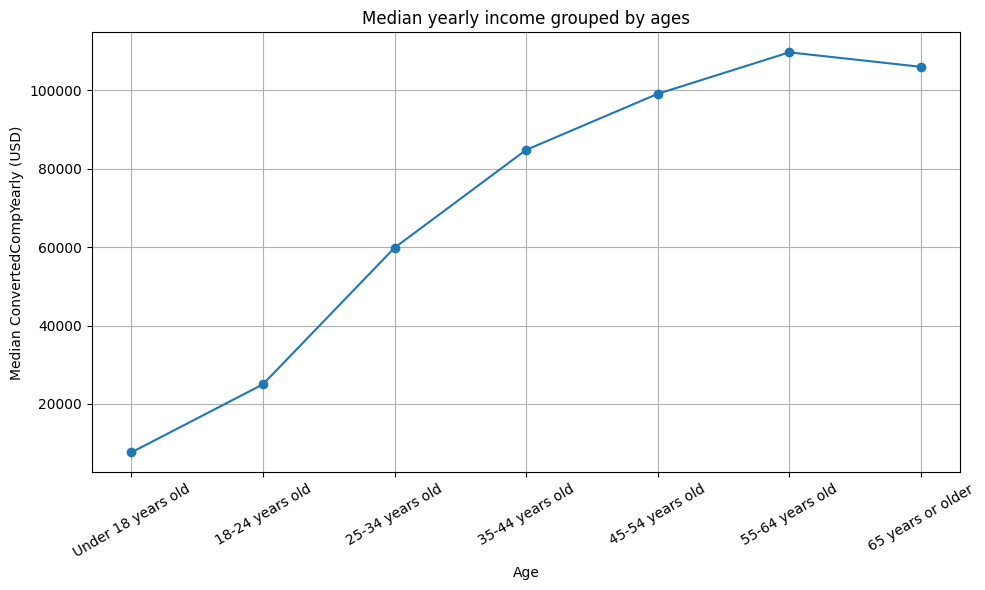

In [18]:
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])

median_by_age = df_clean.groupby('Age')['ConvertedCompYearly'].median()

order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

median_by_age = median_by_age.reindex(order).reset_index()
median_by_age.columns = ['AgeGroup', 'MedianCompensation']

plt.figure(figsize=(10, 6))
plt.plot(median_by_age['AgeGroup'], median_by_age['MedianCompensation'], marker='o')
plt.title('Median yearly income grouped by ages')
plt.xlabel('Age')
plt.ylabel('Median ConvertedCompYearly (USD)')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


         Age Group  Median Compensation (USD)
0  25-34 years old                    59825.0
1  35-44 years old                    84796.0


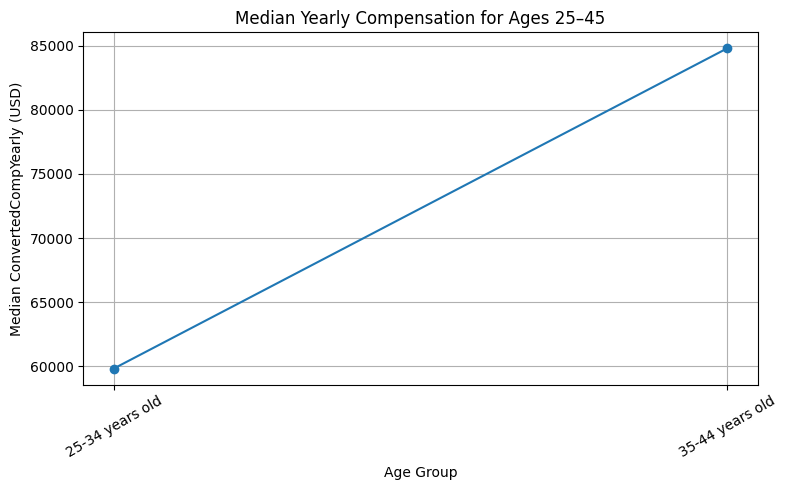

In [24]:
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])

age_bins = ['25-34 years old', '35-44 years old']
df_focus = df_clean[df_clean['Age'].isin(age_bins)]

median_focus = (
    df_focus
      .groupby('Age')['ConvertedCompYearly']
      .median()
      .reindex(age_bins)
      .reset_index()
)
median_focus.columns = ['Age Group', 'Median Compensation (USD)']

print(median_focus)

plt.figure(figsize=(8, 5))
plt.plot(
    median_focus['Age Group'],
    median_focus['Median Compensation (USD)'],
    marker='o'
)
plt.title('Median Yearly Compensation for Ages 25–45')
plt.xlabel('Age Group')
plt.ylabel('Median ConvertedCompYearly (USD)')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


      Experience Level  Median Job Satisfaction (Points)
0     Less than 1 year                              10.0
1            1-2 years                              15.0
2            3-5 years                              20.0
3            6-8 years                              20.0
4           9-11 years                              20.0
5          12-14 years                              20.0
6          15-17 years                              20.0
7          18-20 years                              20.0
8          21-30 years                              20.0
9          31-40 years                              20.0
10         41-50 years                              20.0
11  More than 50 years                              20.0


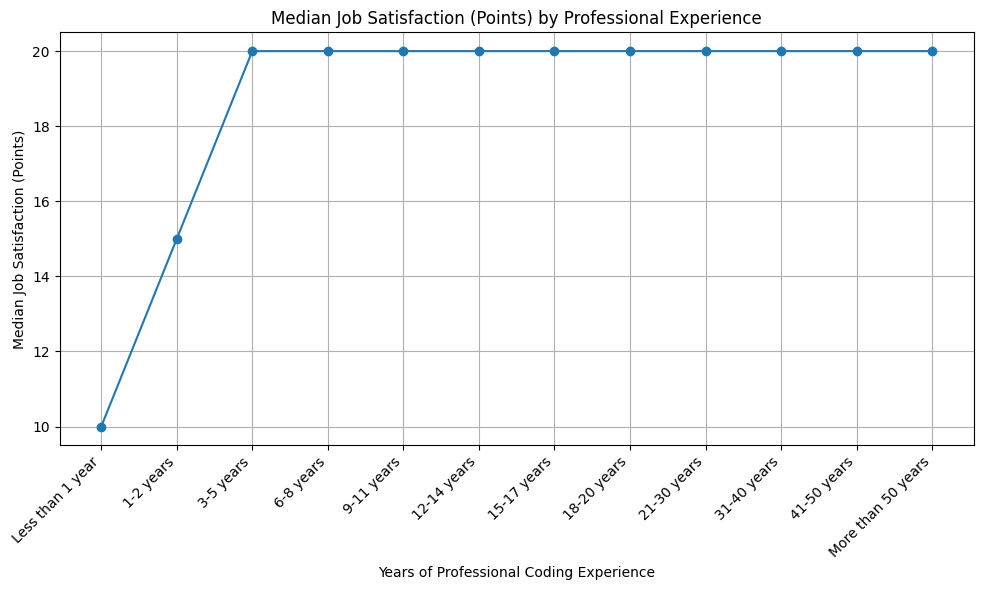

In [28]:
df['YearsCodeProNum'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df.loc[df['YearsCodePro'] == 'Less than 1 year', 'YearsCodeProNum'] = 0.5
df.loc[df['YearsCodePro'] == 'More than 50 years', 'YearsCodeProNum'] = 51

df_clean = df.dropna(subset=['YearsCodeProNum', 'JobSatPoints_6']).copy()

bins = [0, 1, 3, 6, 9, 12, 15, 18, 21, 31, 41, 51, float('inf')]
labels = [
    'Less than 1 year',
    '1-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-30 years',
    '31-40 years',
    '41-50 years',
    'More than 50 years'
]

df_clean.loc[:, 'ExpGroup'] = pd.cut(
    df_clean['YearsCodeProNum'],
    bins=bins,
    labels=labels,
    right=False
)

median_sat = (
    df_clean
      .groupby('ExpGroup', observed=True)['JobSatPoints_6']
      .median()
      .reindex(labels)
      .reset_index()
)
median_sat.columns = ['Experience Level', 'Median Job Satisfaction (Points)']

print(median_sat)

plt.figure(figsize=(10, 6))
plt.plot(
    median_sat['Experience Level'],
    median_sat['Median Job Satisfaction (Points)'],
    marker='o'
)
plt.title('Median Job Satisfaction (Points) by Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


      Experience Level  Median Compensation (USD)
0     Less than 1 year                    21289.0
1            1-2 years                    28252.0
2            3-5 years                    45860.0
3            6-8 years                    65802.0
4           9-11 years                    79481.0
5          12-14 years                    85925.0
6          15-17 years                    91295.0
7          18-20 years                    96666.0
8          21-30 years                   106694.0
9          31-40 years                   110936.5
10         41-50 years                   127388.0
11  More than 50 years                   160000.0


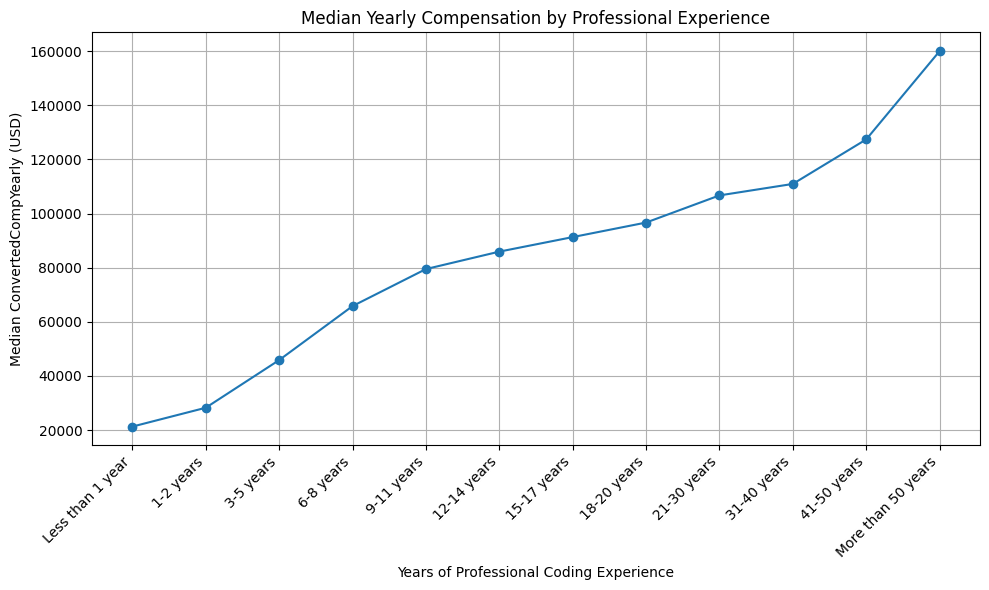

In [29]:
df['YearsCodeProNum'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df.loc[df['YearsCodePro'] == 'Less than 1 year', 'YearsCodeProNum'] = 0.5
df.loc[df['YearsCodePro'] == 'More than 50 years', 'YearsCodeProNum'] = 51

df_clean = df.dropna(subset=['YearsCodeProNum', 'ConvertedCompYearly']).copy()

bins = [0, 1, 3, 6, 9, 12, 15, 18, 21, 31, 41, 51, float('inf')]
labels = [
    'Less than 1 year',
    '1-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-30 years',
    '31-40 years',
    '41-50 years',
    'More than 50 years'
]

df_clean.loc[:, 'ExpGroup'] = pd.cut(
    df_clean['YearsCodeProNum'],
    bins=bins,
    labels=labels,
    right=False
)

median_comp = (
    df_clean
      .groupby('ExpGroup', observed=True)['ConvertedCompYearly']
      .median()
      .reindex(labels)
      .reset_index()
)
median_comp.columns = ['Experience Level', 'Median Compensation (USD)']

print(median_comp)

plt.figure(figsize=(10, 6))
plt.plot(
    median_comp['Experience Level'],
    median_comp['Median Compensation (USD)'],
    marker='o'
)
plt.title('Median Yearly Compensation by Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median ConvertedCompYearly (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


      Experience Level  Median Job Satisfaction (Points)
0     Less than 1 year                              10.0
1            1-2 years                              15.0
2            3-5 years                              20.0
3            6-8 years                              20.0
4           9-11 years                              20.0
5          12-14 years                              20.0
6          15-17 years                              20.0
7          18-20 years                              20.0
8          21-30 years                              20.0
9          31-40 years                              20.0
10         41-50 years                              20.0
11  More than 50 years                              20.0


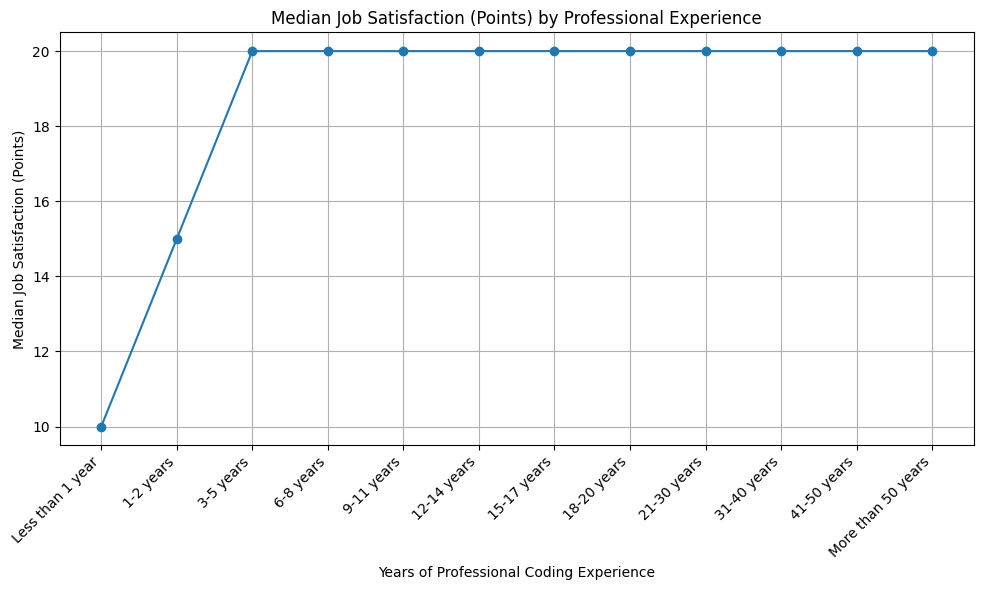

In [30]:
df['YearsCodeProNum'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df.loc[df['YearsCodePro'] == 'Less than 1 year', 'YearsCodeProNum'] = 0.5
df.loc[df['YearsCodePro'] == 'More than 50 years', 'YearsCodeProNum'] = 51

df_clean = df.dropna(subset=['YearsCodeProNum', 'JobSatPoints_6']).copy()

bins = [0, 1, 3, 6, 9, 12, 15, 18, 21, 31, 41, 51, float('inf')]
labels = [
    'Less than 1 year',
    '1-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-30 years',
    '31-40 years',
    '41-50 years',
    'More than 50 years'
]
df_clean.loc[:, 'ExpGroup'] = pd.cut(
    df_clean['YearsCodeProNum'],
    bins=bins,
    labels=labels,
    right=False
)

median_sat = (
    df_clean
      .groupby('ExpGroup', observed=True)['JobSatPoints_6']
      .median()
      .reindex(labels)
      .reset_index()
)
median_sat.columns = ['Experience Level', 'Median Job Satisfaction (Points)']

print(median_sat)

plt.figure(figsize=(10, 6))
plt.plot(
    median_sat['Experience Level'],
    median_sat['Median Job Satisfaction (Points)'],
    marker='o'
)
plt.title('Median Job Satisfaction (Points) by Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (Points)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
